<a href="https://colab.research.google.com/github/ved-00/Netflix-content-Insight/blob/main/netflix2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Basic data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load the Netflix dataset (replace with your path if needed)
df = pd.read_csv("/content/netflix_titles.csv")

# Preview shape and sample rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Check data types and nulls
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Number of unique values per column
df.nunique()

# Summary stats (only useful for release_year right now)
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
# Drop rows with no title (if any)
df.dropna(subset=["title"], inplace=True)

# Fill nulls with "Unknown" for categorical analysis
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)
df['date_added'].fillna("Unknown", inplace=True)

# Convert 'date_added' to datetime where possible
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


<ipython-input-8-f7f701a877b1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
<ipython-input-8-f7f701a877b1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

<ipython-input-9-c38bcb70ba7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


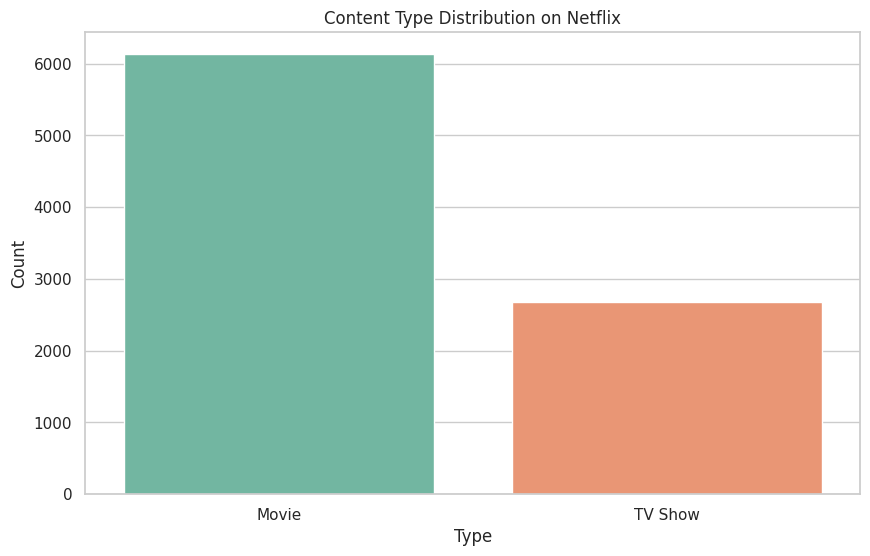

In [9]:
# Count plot of content types
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


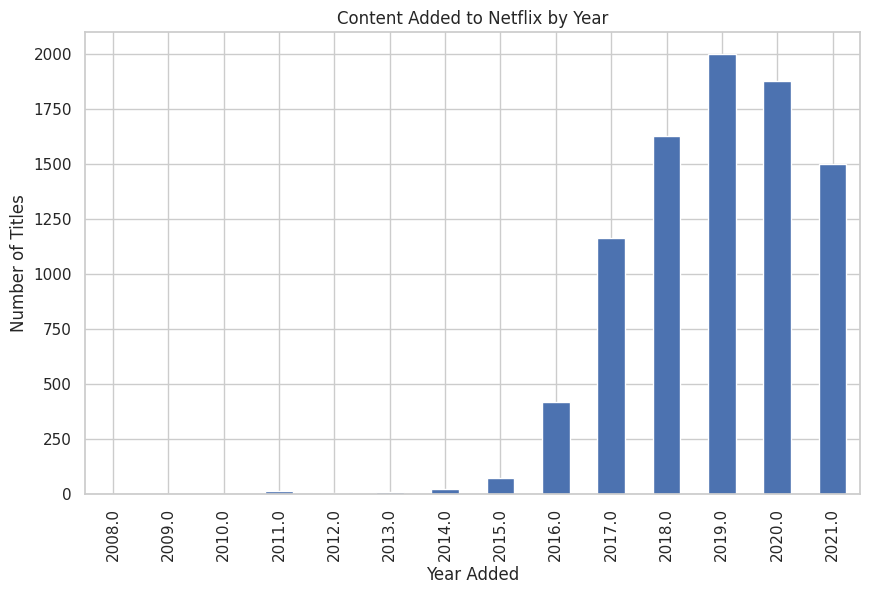

In [10]:
# Number of titles added per year
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


<ipython-input-11-ef1132ceed5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


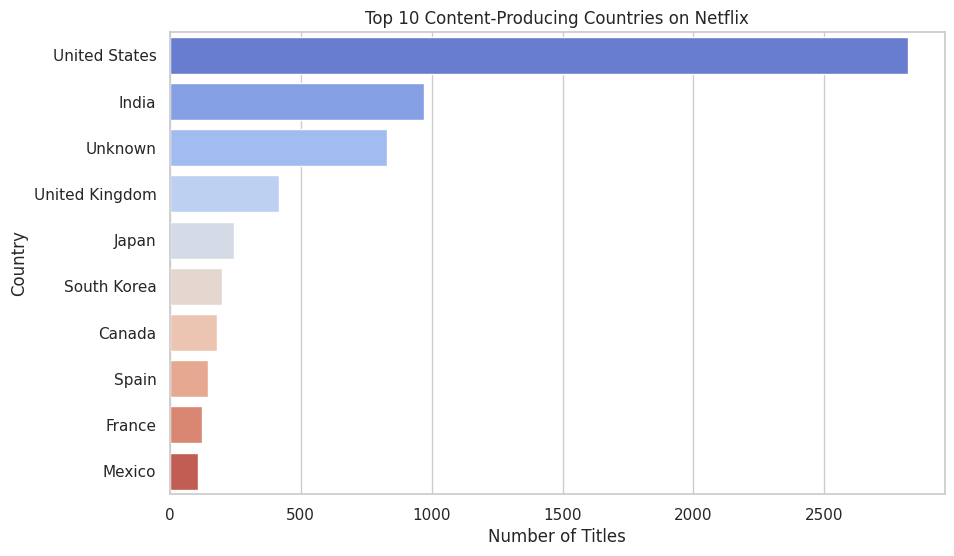

In [11]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


<ipython-input-12-653054719bac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


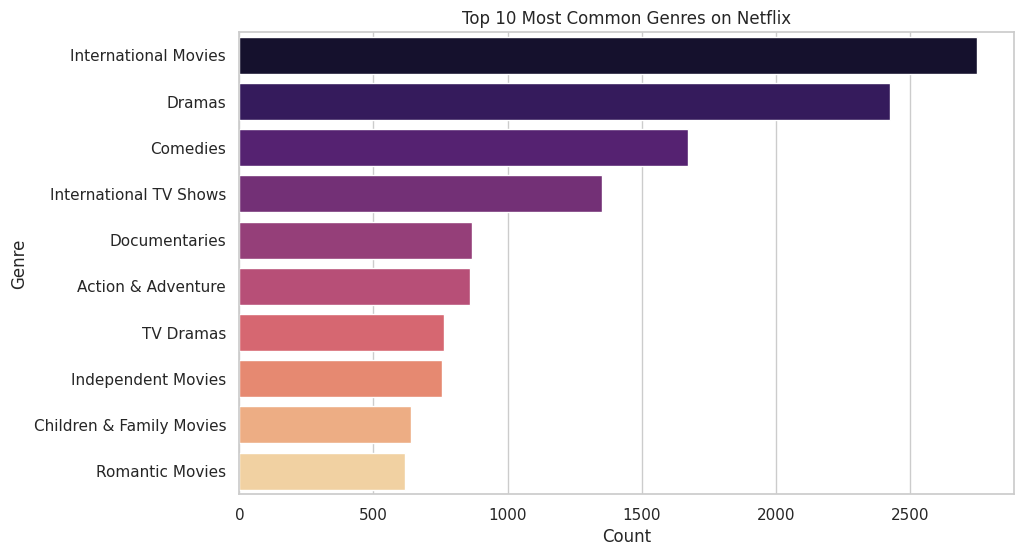

In [12]:
# Explode genre into individual rows
df_exploded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Top 10 genres
top_genres = df_exploded['genre'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


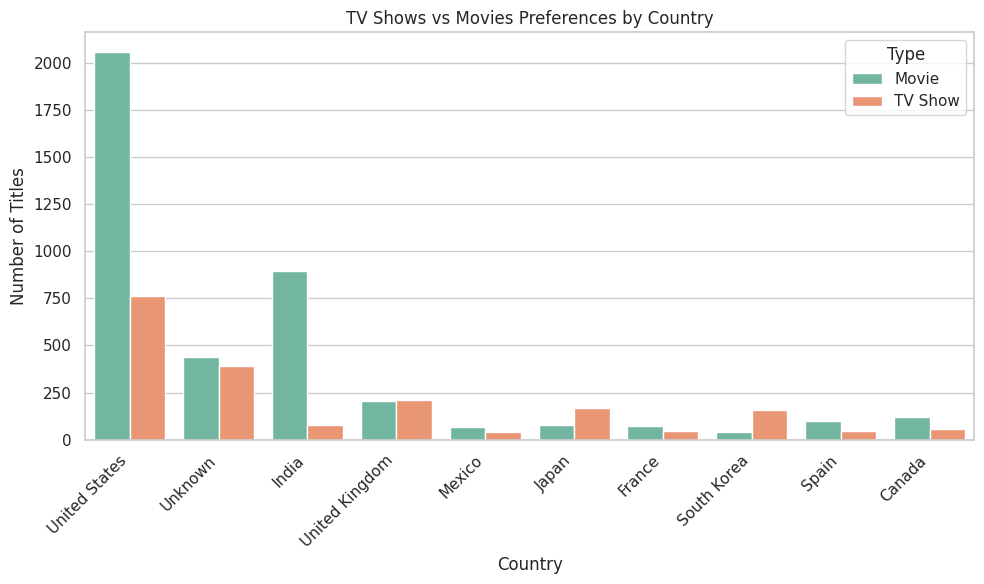

In [13]:
# Countplot by country and type
# Define the list of countries to filter by, using the index of the top_countries series
countries = top_countries.index.tolist()

top_type_countries = df[df['country'].isin(countries)]

plt.figure(figsize=(10,6))
sns.countplot(data=top_type_countries, x='country', hue='type', palette='Set2')
plt.title("TV Shows vs Movies Preferences by Country")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees and align to the right
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

<ipython-input-14-bde0b5f0f432>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


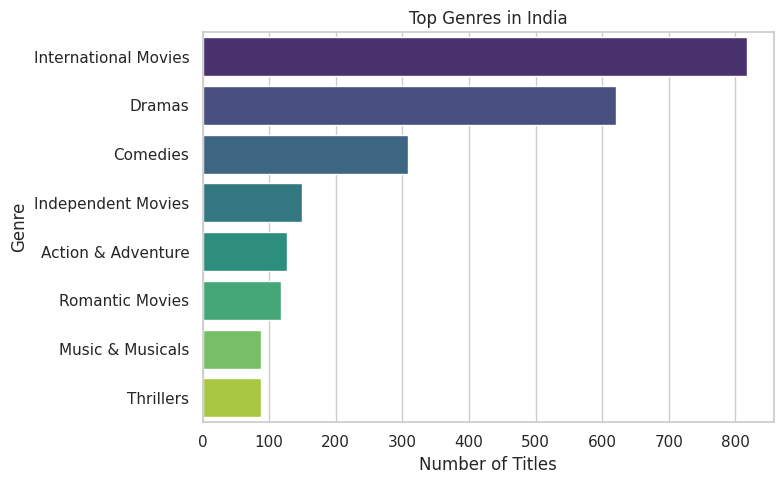

<ipython-input-14-bde0b5f0f432>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


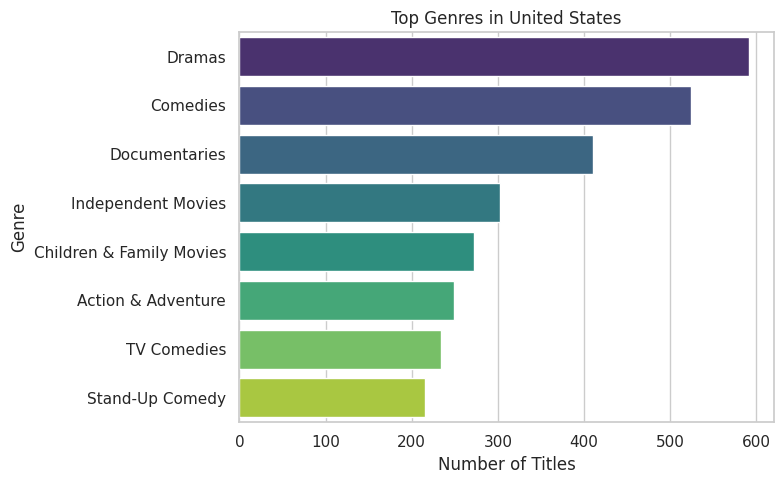

<ipython-input-14-bde0b5f0f432>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


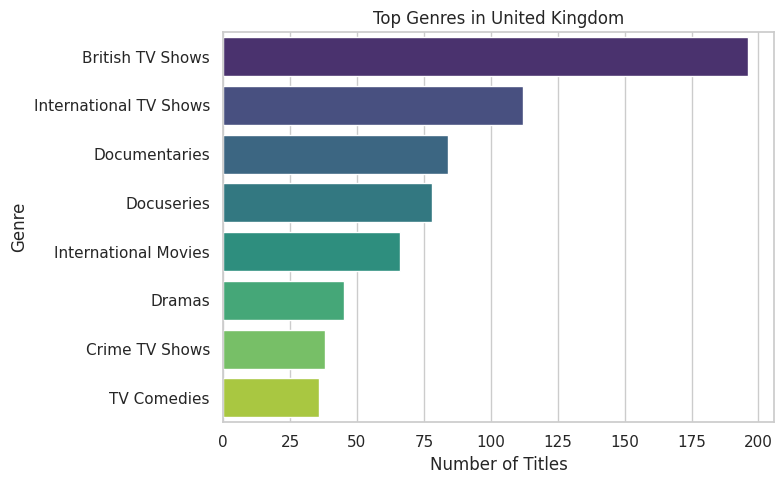

<ipython-input-14-bde0b5f0f432>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


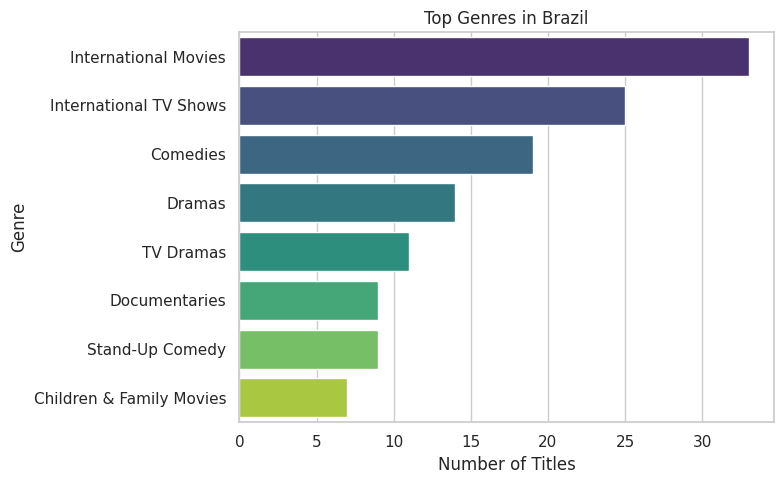

In [14]:
# Focus on selected countries
countries = ['India', 'United States', 'United Kingdom', 'Brazil']
genre_by_country = df[df['country'].isin(countries)].copy()

# Explode genre list
genre_by_country = genre_by_country.assign(genre=genre_by_country['listed_in'].str.split(',')).explode('genre')
genre_by_country['genre'] = genre_by_country['genre'].str.strip()

# Plot genre distribution per country
for country in countries:
    top_genres = genre_by_country[genre_by_country['country'] == country]['genre'].value_counts().head(8)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title(f"Top Genres in {country}")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


<ipython-input-15-4e5e11735f3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_heat.values, y=top_countries_heat.index, palette='cubehelix')


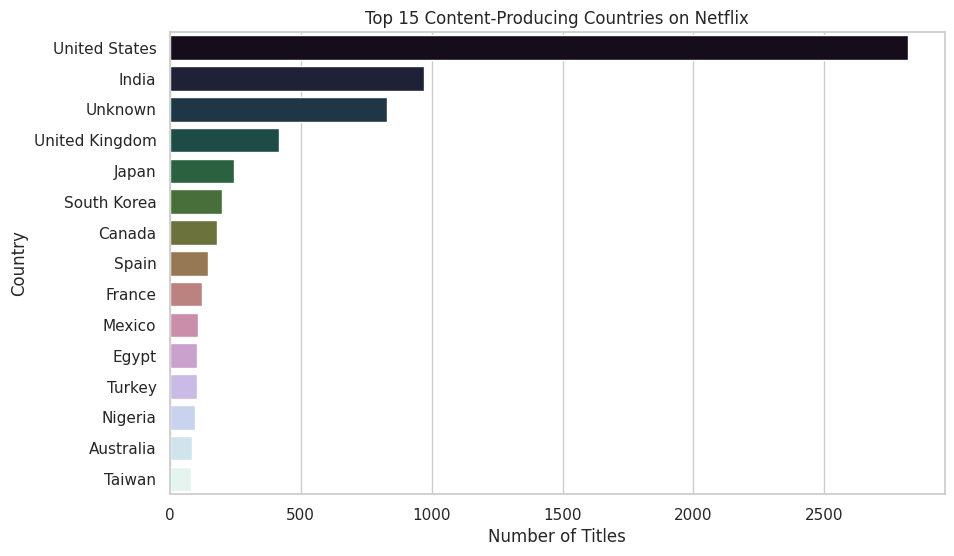

In [15]:
top_countries_heat = df['country'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_heat.values, y=top_countries_heat.index, palette='cubehelix')
plt.title("Top 15 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


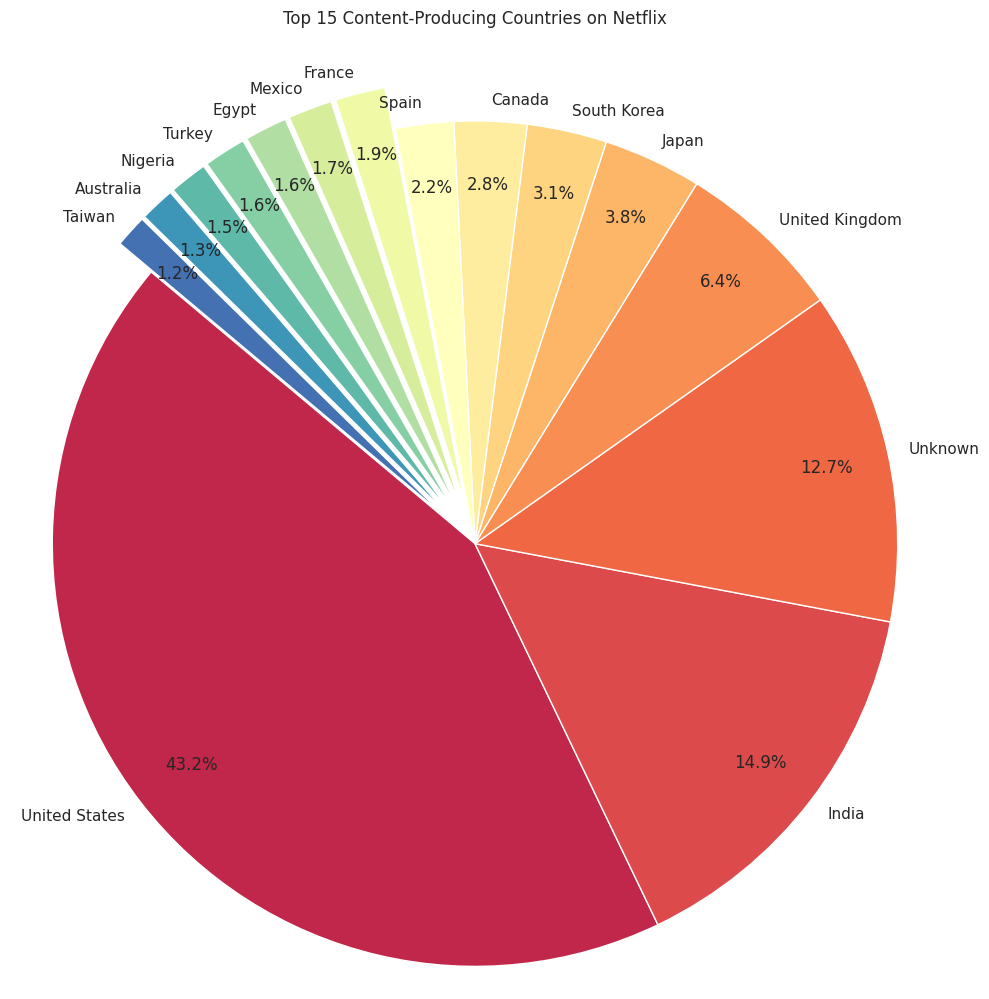

In [20]:
# Calculate the top 15 countries again
top_countries_pie = df['country'].value_counts().head(15)

# Create an explode list to highlight smaller slices (adjust as needed)
explode = [0] * 15  # Start with no explode for any slice
# You might want to explode the slices with smaller percentages more
# Let's identify the indices of the smaller percentages
threshold = top_countries_pie.sum() * 0.02 # Example threshold: explode slices less than 2%
for i, value in enumerate(top_countries_pie):
    if value < threshold:
        explode[i] = 0.1 # Explode these slices by a small amount

# Create the pie chart with adjusted label distances and explode
plt.figure(figsize=(12, 12)) # Reduced figure size slightly
plt.pie(top_countries_pie,
        labels=top_countries_pie.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Spectral', 15),
        pctdistance=0.85,  # Adjust distance of percentages from center
        labeldistance=1.05, # Back to the slightly closer label distance
        explode=explode) # Apply the explode effect
plt.title('Top 15 Content-Producing Countries on Netflix', pad=30) # Increased padding for more space
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()